<a href="https://colab.research.google.com/github/sanjit1995/Football-Players-Match-Rating-Prediction/blob/master/backend/models/FootballMatchPlayersRatingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/SoccerPlayersData.csv")

In [ ]:
train.shape

(22555, 47)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            22555 non-null  int64  
 1   name                 22555 non-null  object 
 2   role                 22549 non-null  object 
 3   acted_as_sweeper     1615 non-null   float64
 4   diving_save          1615 non-null   float64
 5   goals_conceded       1615 non-null   float64
 6   minutes_played       22555 non-null  int64  
 7   punches              1615 non-null   float64
 8   saves                1615 non-null   float64
 9   saves_inside_box     1615 non-null   float64
 10  throws               1615 non-null   float64
 11  accurate_passes      22555 non-null  int64  
 12  assists              20940 non-null  float64
 13  chances_created      20940 non-null  float64
 14  goals                20940 non-null  float64
 15  pass_success         20940 non-null 

In [ ]:
x = pd.DataFrame()
x["calculated_value"] = train['accurate_passes'] / train['passes']
x["actual_values"] = train['pass_success']
x

,calculated_value,actual_values
0,0.777778,NaN
1,0.666667,67%
2,0.818182,82%
3,0.818182,NaN
4,0.600000,60%
...,...,...
22550,0.956522,96%
22551,0.840000,84%
22552,0.814815,81%
22553,0.666667,67%


In [ ]:
len(train[(train.rating.isnull()) & (train.minutes_played > 10)])

34

In [ ]:
toDeleteNullRatingIndexes = train[(train.rating.isnull()) & (train.minutes_played > 10)].index.values
train = train.drop(toDeleteNullRatingIndexes)

In [ ]:
train[train.pass_success.isnull()][['accurate_passes','passes','pass_success']]

,accurate_passes,passes,pass_success
0,14,18,NaN
3,9,11,NaN
17,17,29,NaN
29,11,21,NaN
42,13,31,NaN
...,...,...,...
22484,20,33,NaN
22498,11,31,NaN
22514,14,27,NaN
22528,22,27,NaN


In [ ]:
len(train[train.role=="Keeper"]), len(train[train.role!="Keeper"])

(1615, 20940)

In [ ]:
train[train.rating.isna()]

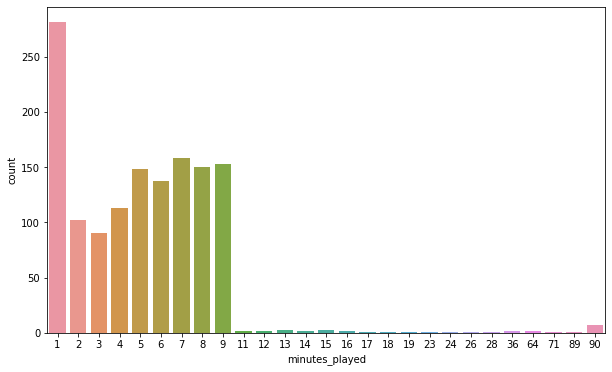

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
rating_df = train[train.rating.isna()][['minutes_played']]
null_mp_df = rating_df.groupby(['minutes_played']).minutes_played.agg('count').to_frame('count').reset_index()
sns.barplot(x="minutes_played", y="count", data=null_mp_df)

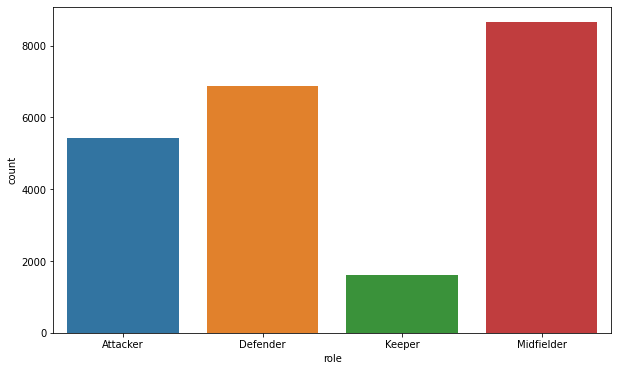

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
roles_df = train.groupby(['role']).role.agg('count').to_frame('count').reset_index()
sns.barplot(x="role", y="count", data=roles_df)

In [ ]:
train

In [ ]:
train.role.value_counts()

Midfielder    8652
Defender      6862
Attacker      5420
Keeper        1615
Name: role, dtype: int64

In [ ]:
train.isnull().sum()

player_id                  0
name                       0
role                       6
acted_as_sweeper       20940
diving_save            20940
goals_conceded         20940
minutes_played             0
punches                20940
saves                  20940
saves_inside_box       20940
throws                 20940
accurate_passes            0
assists                 1615
chances_created         1615
goals                   1615
pass_success            1615
total_shots                0
blocked_shots              0
shot_accuracy              0
shot_off_target            0
shot_on_target             0
shots_woodwork             0
accurate_long_balls        0
crosses                    0
key_passes                 0
long_balls                 0
passes                     0
touches                    0
aerials_lost               0
aerials_won                0
clearances                 0
dispossessed               0
dribbles_attempted         0
dribbles_succeeded         0
duels_lost    

In [ ]:
train.columns[train.isna().any()]

Index(['role', 'acted_as_sweeper', 'diving_save', 'goals_conceded', 'punches',
       'saves', 'saves_inside_box', 'throws', 'assists', 'chances_created',
       'goals', 'pass_success', 'was_subbed', 'yellow_card', 'red_card',
       'rating'],
      dtype='object')

In [ ]:
null_values_dict = train.isnull().sum().to_dict()
for key, value in null_values_dict.items():
  if(value == 0):
    continue
  else:
    print(key," : ", value)

role  :  6
acted_as_sweeper  :  20940
diving_save  :  20940
goals_conceded  :  20940
punches  :  20940
saves  :  20940
saves_inside_box  :  20940
throws  :  20940
assists  :  1615
chances_created  :  1615
goals  :  1615
pass_success  :  1615
was_subbed  :  12685
yellow_card  :  19280
red_card  :  22491
rating  :  1366


In [ ]:
train.is_a_sub.value_counts()

0    17617
1     4938
Name: is_a_sub, dtype: int64

In [ ]:
df[['acted_as_sweeper','diving_save','goals_conceded','punches']] = df[['acted_as_sweeper','diving_save']].fillna(value=0)

In [ ]:
train.head()

,player_id,name,role,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,chances_created,goals,pass_success,total_shots,blocked_shots,shot_accuracy,shot_off_target,shot_on_target,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
0,169756,Adrian,Keeper,1.0,0.0,51,0.0,2.0,0.0,0.0,14,0.0,0.0,0.0,0,0,0,0%,0,0,4,0,0,8,18,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,6.2
1,38807,James Milner,Midfielder,0.0,0.0,4,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,67%,0,0,0%,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,NaN
2,303339,Sadio Mané,Attacker,0.0,0.0,16,0.0,0.0,0.0,0.0,9,0.0,0.0,0.0,82%,0,0,0%,0,0,0,0,0,0,11,13,0,0,0,1,1,1,2,1,0,0,1,0,0,0,1,0.0,0.0,0.0,6.1
3,319784,Alisson Becker,Keeper,1.0,0.0,39,0.0,2.0,0.0,1.0,9,0.0,0.0,0.0,0,0,0,0%,0,0,1,0,0,2,11,14,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1.0,0.0,0.0,6.2
4,760712,Trent Alexander-Arnold,Defender,0.0,0.0,90,0.0,0.0,0.0,0.0,24,1.0,2.0,0.0,60%,2,0,50%,1,1,4,8,3,10,40,73,0,1,1,1,1,0,4,2,1,2,7,1,1,0,0,0.0,0.0,0.0,7.7


In [ ]:
train.describe()

,player_id,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,chances_created,goals,total_shots,blocked_shots,shot_off_target,shot_on_target,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
count,2.255500e+04,1615.000000,1615.000000,22555.000000,1615.000000,1615.000000,1615.000000,1615.000000,22555.000000,20940.000000,20940.000000,20940.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,9870.000000,3275.0,64.0,21189.000000
mean,3.757534e+05,1.426625,0.317028,70.245666,0.305263,2.716409,1.665635,4.220433,26.387763,0.080516,0.179370,0.114852,0.993039,0.227444,0.400621,0.341565,2.081623,1.452450,0.734737,4.223498,32.698027,46.633784,1.237553,1.264021,1.173177,0.650410,1.237863,0.747373,3.864420,3.931279,0.884682,0.742186,4.282155,1.112126,0.661583,0.847395,0.218932,0.501114,1.0,1.0,6.696739
std,2.648706e+05,1.353561,1.002995,29.499013,0.589302,1.918106,1.449574,2.429875,20.309901,0.294192,0.431035,0.357677,1.357096,0.493426,0.720062,0.688476,2.634320,2.442999,1.110342,5.133754,22.341214,26.828320,1.656355,1.777915,1.769927,1.014012,1.749509,1.207895,3.155255,3.137359,1.083199,1.080920,3.194726,1.365784,0.964334,1.112991,0.413531,0.500024,0.0,0.0,0.866871
min,2.805000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,2.300000
25%,1.665950e+05,0.000000,0.000000,57.000000,0.000000,1.000000,1.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,6.100000
50%,3.038000e+05,1.000000,0.000000,90.000000,0.000000,2.000000,1.000000,4.000000,22.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,29.000000,45.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,6.700000
75%,5.819190e+05,2.000000,0.000000,90.000000,0.000000,4.000000,2.000000,6.000000,37.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,3.000000,2.000000,1.000000,6.000000,46.000000,64.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,6.000000,6.000000,1.000000,1.000000,6.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.0,7.300000
max,1.163226e+06,8.000000,9.000000,120.000000,4.000000,12.000000,8.000000,13.000000,178.000000,3.000000,4.000000,4.000000,11.000000,4.000000,6.000000,7.000000,26.000000,31.000000,11.000000,44.000000,188.000000,195.000000,20.000000,24.000000,16.000000,10.000000,20.000000,12.000000,29.000000,28.000000,8.000000,9.000000,23.000000,11.000000,8.000000,9.000000,1.000000,1.000000,1.0,1.0,9.900000


In [ ]:
train.isnull().sum()

In [ ]:
train[train.rating.isnull()]

In [ ]:
train[(train.rating.isnull()) & (train.was_subbed==1)].was_subbed.agg('count')

13

In [ ]:
train[(train.rating.isnull()) & (train.is_a_sub==1)].was_subbed.agg('count')

1320

In [ ]:
train[(train.rating.isnull()) & (train.yellow_card==1.0) & (train.red_card==1.0)]

,player_id,name,role,acted_as_sweeper,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,chances_created,goals,pass_success,total_shots,blocked_shots,shot_accuracy,shot_off_target,shot_on_target,shots_woodwork,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
16450,108808,Mario Balotelli,Attacker,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,2,0.0,0.0,0.0,100%,0,0,0%,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0.0,1.0,1.0,NaN


In [ ]:
def cleanData(df):
  df = df.drop(['acted_as_sweeper','shots_woodwork'], axis=1)

  nice_play_indexes = train[(train.rating.isnull()) & ((train.goals>=1.0) | (train.assists>=1.0) | (train.saves>=1.0) | (train.key_passes>=1.0) 
                          | (train.chances_created>=1.0))].index.values
  for nice_play_index in nice_play_indexes:
    train.at[nice_play_indexes,'rating'] = 6.0

  yc_rc_indexes = train[(train.rating.isnull()) & (train.yellow_card==1.0) & (train.red_card==1.0)].index.values
  for yc_rc_index in yc_rc_indexes:
    train.at[yc_rc_index,'rating'] = 2.0

  rc_indexes = train[(train.rating.isnull()) & (train.yellow_card==0.0) & (train.red_card==1.0)].index.values
  for rc_index in rc_indexes:
    train.at[rc_index,'rating'] = 3.0
  
  yc_indexes = train[(train.rating.isnull()) & (train.yellow_card==1.0) & (train.red_card==0.0)].index.values
  for yc_index in yc_indexes:
    train.at[yc_index,'rating'] = 4.0
  
  contributed_null_indexes = train[train.rating.isnull()].index.values
  for contributed_null_index in contributed_null_indexes:
    train.at[contributed_null_index,'rating'] = 5.0

  train[['diving_save','goals_conceded','punches','saves','saves_inside_box','throws','assists','chances_created','goals','pass_success','was_subbed','yellow_card','red_card']] 
  = train[['diving_save','goals_conceded','punches','saves','saves_inside_box','throws','assists','chances_created','goals','pass_success','was_subbed','yellow_card','red_card']].fillna(value=0)

  float_to_int_columns = ['diving_save','goals_conceded','punches','saves','saves_inside_box','throws','assists','chances_created','goals','was_subbed',
                          'yellow_card','red_card']

  for column_name in float_to_int_columns:
    df[column_name] = df[column_name].astype(int)

  toFindPassAccIndexes = train[(train.pass_success==0) & (train.passes>0)].index.values
  
  train['pass_success'] = train['pass_success'].str.rstrip('%').astype('float') / 100.0
  train['shot_accuracy'] = train['shot_accuracy'].str.rstrip('%').astype('float') / 100.0

  for passAccIndex in toFindPassAccIndexes:
  if train.loc[passAccIndex, 'passes'] > 0:
    train.at[passAccIndex, 'pass_success'] = train.loc[passAccIndex, 'accurate_passes'] / train.loc[passAccIndex, 'passes']

  train['pass_success'] = train['pass_success'].fillna(0).astype('float')

  scaler = joblib.load('/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/scaler_minutes_played.pkl') 
  df['minutes_played'] = scaler.transform(df[['minutes_played']])
  return df

In [ ]:
train.describe()

,player_id,acted_as_sweeper,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,chances_created,goals,total_shots,blocked_shots,shot_off_target,shot_on_target,shots_woodwork,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
count,2.255500e+04,1615.0,1615.000000,1615.000000,22555.000000,1615.000000,1615.000000,1615.000000,1615.000000,22555.000000,20940.000000,20940.000000,20940.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.0,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,9870.000000,3275.0,64.0,21189.000000
mean,3.757534e+05,0.0,1.426625,0.317028,70.245666,0.305263,2.716409,1.665635,4.220433,26.387763,0.080516,0.179370,0.114852,0.993039,0.227444,0.400621,0.341565,0.0,2.081623,1.452450,0.734737,4.223498,32.698027,46.633784,1.237553,1.264021,1.173177,0.650410,1.237863,0.747373,3.864420,3.931279,0.884682,0.742186,4.282155,1.112126,0.661583,0.847395,0.218932,0.501114,1.0,1.0,6.696739
std,2.648706e+05,0.0,1.353561,1.002995,29.499013,0.589302,1.918106,1.449574,2.429875,20.309901,0.294192,0.431035,0.357677,1.357096,0.493426,0.720062,0.688476,0.0,2.634320,2.442999,1.110342,5.133754,22.341214,26.828320,1.656355,1.777915,1.769927,1.014012,1.749509,1.207895,3.155255,3.137359,1.083199,1.080920,3.194726,1.365784,0.964334,1.112991,0.413531,0.500024,0.0,0.0,0.866871
min,2.805000e+03,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,2.300000
25%,1.665950e+05,0.0,0.000000,0.000000,57.000000,0.000000,1.000000,1.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,16.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,6.100000
50%,3.038000e+05,0.0,1.000000,0.000000,90.000000,0.000000,2.000000,1.000000,4.000000,22.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,3.000000,29.000000,45.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,6.700000
75%,5.819190e+05,0.0,2.000000,0.000000,90.000000,0.000000,4.000000,2.000000,6.000000,37.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.0,3.000000,2.000000,1.000000,6.000000,46.000000,64.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,6.000000,6.000000,1.000000,1.000000,6.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.0,7.300000
max,1.163226e+06,0.0,8.000000,9.000000,120.000000,4.000000,12.000000,8.000000,13.000000,178.000000,3.000000,4.000000,4.000000,11.000000,4.000000,6.000000,7.000000,0.0,26.000000,31.000000,11.000000,44.000000,188.000000,195.000000,20.000000,24.000000,16.000000,10.000000,20.000000,12.000000,29.000000,28.000000,8.000000,9.000000,23.000000,11.000000,8.000000,9.000000,1.000000,1.000000,1.0,1.0,9.900000


In [ ]:
train.acted_as_sweeper.value_counts()

0.0    1615
Name: acted_as_sweeper, dtype: int64

In [ ]:
train = train.drop(['acted_as_sweeper','shots_woodwork'], axis=1)

In [ ]:
train[train.rating.isnull()].index.values

In [ ]:
train = train.drop([ 1836,  2405,  4088,  4133,  5009,  5176,  6991,  7229, 10215,
       10929, 11638, 11762, 13662, 13663, 13664, 13666, 13667, 13668,
       13669, 13670, 13671, 13672, 13673, 13674, 13675, 13676, 15196,
       15845, 16298, 16798, 17813, 18806, 20527, 21443])

In [ ]:
x = train.minutes_played.unique()
x.sort()
print(x)

In [ ]:
train.iloc[train[(train.rating.isnull()) & (train['yellow_card']==1.0) & (train['red_card']==1.0)].index.values]

In [ ]:
train[(train.rating.isnull()) & ((train.goals>=1.0) | (train.assists>=1.0) | (train.saves>=1.0) | (train.key_passes>=1.0) | (train.chances_created>=1.0))].index.values

In [ ]:
null_rating_indexes = train[(train.rating.isnull()) & (train.yellow_card==0.0) & (train.red_card==0.0)].index.values

In [ ]:
null_rating_indexes

array([    1,    28,    40, ..., 22426, 22440, 22541])

In [ ]:
yc_indexes = [757,  1268,  1599,  2829,  3573,  4686,  5106,  5135,  7705,
        8562,  8607,  8974,  9031,  9590,  9978, 10243, 10496, 11376,
       12040, 12264, 12404, 13277, 13556, 14080, 14276, 15266, 15603,
       15770, 15923, 16367, 16504, 16561, 16629, 17116, 17256, 18169,
       18708, 19166, 19714, 19772, 19984, 20164, 20567, 22176, 22412]
train.at[16450,'rating'] = 2.0
for yc_index in yc_indexes:
  train.at[yc_index,'rating'] = 4.0
train.at[8963,'rating'] = 3.0
train.at[20862,'rating'] = 3.0
contributed_null_indexes = [218,   451,   548,   728,   756,   785,   826,  1049,  1159,
        1268,  1530,  1599,  1752,  1875,  1984,  1996,  2011,  2120,
        2270,  2282,  2623,  2666,  3029,  3422,  3505,  3545,  3794,
        4106,  4130,  4444,  5106,  5422,  5449,  5532,  5603,  5772,
        6051,  6065,  6134,  6218,  6549,  6564,  6712,  7020,  7104,
        7286,  7422,  7454,  7592,  7904,  7998,  8270,  8406,  8467,
        8528,  8529,  8702,  8761,  8810,  8932,  8934,  8974,  8975,
        9072,  9213,  9465,  9519,  9701,  9757,  9880,  9964,  9978,
       10188, 10287, 10578, 10831, 10916, 10943, 11068, 11305, 11319,
       11445, 11568, 11581, 12208, 12377, 12418, 12490, 12767, 12840,
       12889, 12903, 12904, 12999, 13217, 13308, 13370, 13415, 13572,
       13773, 13926, 14080, 14276, 14623, 14960, 15043, 15184, 15266,
       15391, 15461, 15603, 15770, 15966, 16146, 16243, 16255, 16477,
       16601, 16629, 16852, 17202, 17411, 17530, 17863, 17895, 18046,
       18184, 18240, 18406, 18435, 18543, 18570, 18597, 18708, 18749,
       19068, 19069, 19166, 19250, 19772, 20275, 20415, 20664, 20678,
       20791, 20832, 20870, 21036, 21103, 21214, 21215, 21321, 21322,
       21512, 21653, 21693, 21694, 21722, 21886, 22024, 22176]
for contributed_null_index in contributed_null_indexes:
  train.at[contributed_null_index,'rating'] = 6.0

In [ ]:
for null_rating_index in null_rating_indexes:
  train.at[null_rating_index,'rating'] = 5.0

In [ ]:
train.at[11096,'role'] = 'Defender'
train.at[12088,'role'] = 'Defender'
train.at[12941,'role'] = 'Defender'
train.at[13421,'role'] = 'Defender'
train.at[21369,'role'] = 'Midfielder'
train.at[22188,'role'] = 'Attacker'

In [ ]:
train.role.value_counts()

Midfielder    8653
Defender      6866
Attacker      5421
Keeper        1615
Name: role, dtype: int64

In [ ]:
train.shape

(22521, 45)

In [ ]:
train.isnull().sum()

In [ ]:
train[['diving_save','goals_conceded','punches','saves','saves_inside_box','throws','assists','chances_created','goals','pass_success','was_subbed','yellow_card','red_card']] = 
train[['diving_save','goals_conceded','punches','saves','saves_inside_box','throws','assists','chances_created','goals','pass_success','was_subbed','yellow_card','red_card']].fillna(value=0)

In [ ]:
train.corr()['rating']

player_id             -0.057770
acted_as_sweeper            NaN
diving_save            0.369986
goals_conceded        -0.377936
minutes_played         0.325380
punches                0.149295
saves                  0.304273
saves_inside_box       0.233254
throws                 0.016570
accurate_passes        0.292759
assists                0.395370
chances_created        0.452430
goals                  0.519837
total_shots            0.350867
blocked_shots          0.128257
shot_off_target        0.166607
shot_on_target         0.405710
shots_woodwork              NaN
accurate_long_balls    0.104054
crosses                0.195059
key_passes             0.406039
long_balls             0.064442
passes                 0.309259
touches                0.383700
aerials_lost          -0.045295
aerials_won            0.145272
clearances             0.095739
dispossessed          -0.008317
dribbles_attempted     0.264932
dribbles_succeeded     0.316599
duels_lost             0.013743
duels_wo

In [ ]:
train.goals.value_counts()

0.0    18784
1.0     1932
2.0      200
3.0       23
4.0        1
Name: goals, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
rating_df = train[['minutes_played','rating']]
goals_conceded_df = train.groupby(['minutes_played']).minutes_played.agg('count').to_frame('count').reset_index()
sns.barplot(x="minutes_played", y="count", data=goals_conceded_df)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22521 entries, 0 to 22554
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            22521 non-null  int64  
 1   name                 22521 non-null  object 
 2   role                 22521 non-null  object 
 3   diving_save          22521 non-null  int64  
 4   goals_conceded       22521 non-null  int64  
 5   minutes_played       22521 non-null  int64  
 6   punches              22521 non-null  int64  
 7   saves                22521 non-null  int64  
 8   saves_inside_box     22521 non-null  int64  
 9   throws               22521 non-null  int64  
 10  accurate_passes      22521 non-null  int64  
 11  assists              22521 non-null  int64  
 12  chances_created      22521 non-null  int64  
 13  goals                22521 non-null  int64  
 14  pass_success         22521 non-null  float64
 15  total_shots          22521 non-null 

In [ ]:
train.head()

,player_id,name,role,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,chances_created,goals,pass_success,total_shots,blocked_shots,shot_accuracy,shot_off_target,shot_on_target,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
0,169756,Adrian,Keeper,1,0,51,0,2,0,0,14,0,0,0,0,0,0,0%,0,0,4,0,0,8,18,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,6.2
1,38807,James Milner,Midfielder,0,0,4,0,0,0,0,2,0,0,0,67%,0,0,0%,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,5.0
2,303339,Sadio Mané,Attacker,0,0,16,0,0,0,0,9,0,0,0,82%,0,0,0%,0,0,0,0,0,0,11,13,0,0,0,1,1,1,2,1,0,0,1,0,0,0,1,0,0,0,6.1
3,319784,Alisson Becker,Keeper,1,0,39,0,2,0,1,9,0,0,0,0,0,0,0%,0,0,1,0,0,2,11,14,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,6.2
4,760712,Trent Alexander-Arnold,Defender,0,0,90,0,0,0,0,24,1,2,0,60%,2,0,50%,1,1,4,8,3,10,40,73,0,1,1,1,1,0,4,2,1,2,7,1,1,0,0,0,0,0,7.7


In [ ]:
float_to_int_columns = ['diving_save','goals_conceded','punches','saves','saves_inside_box','throws','assists','chances_created','goals','was_subbed','yellow_card','red_card']

In [ ]:
for column_name in float_to_int_columns:
  train[column_name] = train[column_name].astype(int)

In [ ]:
train['pass_success'] = train['pass_success'].str.rstrip('%').astype('float') / 100.0
train['shot_accuracy'] = train['shot_accuracy'].str.rstrip('%').astype('float') / 100.0

In [ ]:
train['pass_success'] = train['pass_success'].fillna(0).astype('float')

In [ ]:
train.head()

,player_id,name,role,acted_as_sweeper,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,chances_created,goals,pass_success,total_shots,blocked_shots,shot_accuracy,shot_off_target,shot_on_target,shots_woodwork,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
0,169756,Adrian,Keeper,0.0,1.0,0.0,51,0.0,2.0,0.0,0.0,14,NaN,NaN,NaN,NaN,0,0,0%,0,0,0,4,0,0,8,18,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,NaN,NaN,6.2
1,38807,James Milner,Midfielder,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,2,0.0,0.0,0.0,67%,0,0,0%,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,NaN,NaN,NaN
2,303339,Sadio Mané,Attacker,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,9,0.0,0.0,0.0,82%,0,0,0%,0,0,0,0,0,0,0,11,13,0,0,0,1,1,1,2,1,0,0,1,0,0,0,1,0.0,NaN,NaN,6.1
3,319784,Alisson Becker,Keeper,0.0,1.0,0.0,39,0.0,2.0,0.0,1.0,9,NaN,NaN,NaN,NaN,0,0,0%,0,0,0,1,0,0,2,11,14,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1.0,NaN,NaN,6.2
4,760712,Trent Alexander-Arnold,Defender,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,24,1.0,2.0,0.0,60%,2,0,50%,1,1,0,4,8,3,10,40,73,0,1,1,1,1,0,4,2,1,2,7,1,1,0,0,NaN,NaN,NaN,7.7


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train['minutes_played'] = scaler.fit_transform(train[['minutes_played']]) 

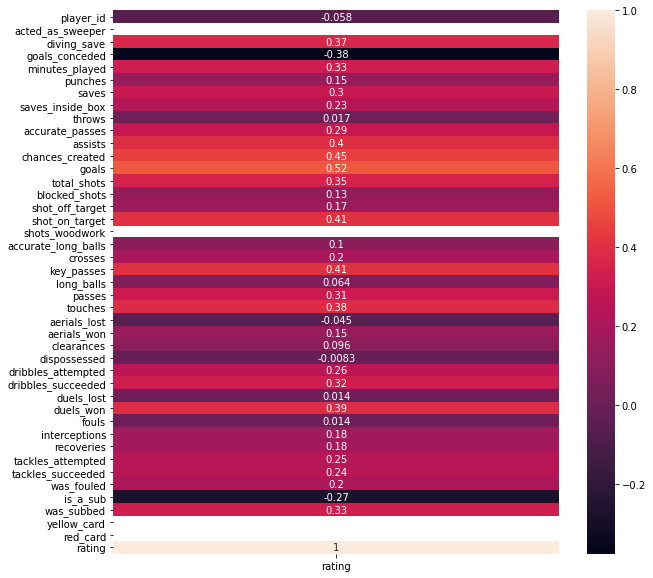

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr()[['rating']],annot=True)
plt.show()

In [ ]:
train.to_csv('/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/CleanedPlayersTrainData.csv')

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/CleanedPlayersTrainData.csv')
train = train.drop(['Unnamed: 0'],axis=1)

In [ ]:
train[train.role=='Keeper'].index.values

1614

In [ ]:
train.shape

(22521, 45)

In [ ]:
train.columns

In [ ]:
toFindPassAccIndexes = train[(train.pass_success==0) & (train.passes>0)].index.values

In [ ]:
train[(train.pass_success==0) & (train.passes>0)]['accurate_passes'].value_counts()

0    159
Name: accurate_passes, dtype: int64

In [ ]:
for passAccIndex in toFindPassAccIndexes:
  if train.loc[passAccIndex, 'passes'] > 0:
    train.at[passAccIndex, 'pass_success'] = train.loc[passAccIndex, 'accurate_passes'] / train.loc[passAccIndex, 'passes']

In [ ]:
train.describe()

In [ ]:
train[train.role=='Keeper'].describe()

,player_id,acted_as_sweeper,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,chances_created,goals,total_shots,blocked_shots,shot_off_target,shot_on_target,shots_woodwork,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
count,1.615000e+03,1615.0,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,0.0,0.0,0.0,1615.000000,1615.000000,1615.000000,1615.000000,1615.0,1615.000000,1615.0,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,20.000000,59.0,4.0,1612.000000
mean,2.604101e+05,0.0,1.426625,0.317028,89.454489,0.305263,2.716409,1.665635,4.220433,18.529412,NaN,NaN,NaN,0.003715,0.001238,0.000619,0.001858,0.0,6.402477,0.0,0.020433,15.450155,27.759752,36.622291,0.026625,0.242105,0.680495,0.004334,0.012384,0.012384,0.078638,0.360991,0.013622,0.039628,7.977709,0.026625,0.019195,0.113313,0.007430,0.400000,1.0,1.0,6.468114
std,2.175700e+05,0.0,1.353561,1.002995,6.500996,0.589302,1.918106,1.449574,2.429875,8.020202,NaN,NaN,NaN,0.070305,0.035180,0.024884,0.043073,0.0,3.702070,0.0,0.141521,7.988132,8.758879,10.030548,0.172192,0.519947,0.879737,0.065713,0.110626,0.110626,0.284909,0.646477,0.115953,0.207457,3.176275,0.164838,0.141695,0.350485,0.085905,0.502625,0.0,0.0,1.066894
min,1.627700e+04,0.0,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,2.300000
25%,9.662300e+04,0.0,0.000000,0.000000,90.000000,0.000000,1.000000,1.000000,2.000000,13.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,4.000000,0.0,0.000000,9.000000,22.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,5.700000
50%,1.845540e+05,0.0,1.000000,0.000000,90.000000,0.000000,2.000000,1.000000,4.000000,17.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,6.000000,0.0,0.000000,15.000000,27.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,6.500000
75%,3.965260e+05,0.0,2.000000,0.000000,90.000000,0.000000,4.000000,2.000000,6.000000,22.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,9.000000,0.0,0.000000,21.000000,32.000000,42.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,7.200000
max,1.110717e+06,0.0,8.000000,9.000000,120.000000,4.000000,12.000000,8.000000,13.000000,61.000000,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,0.0,26.000000,0.0,1.000000,44.000000,69.000000,79.000000,2.000000,4.000000,5.000000,1.000000,1.000000,1.000000,2.000000,6.000000,1.000000,2.000000,20.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.0,1.0,9.200000


In [ ]:
player_train = train.drop(train[train.role=='Keeper'].index.values)
keeper_train = train[train.role=='Keeper']
player_train = player_train.reset_index()
keeper_train = keeper_train.reset_index()
player_train = player_train.drop(['index'],axis=1)
keeper_train = keeper_train.drop(['index'],axis=1)
player_train = player_train.drop(['diving_save','goals_conceded','punches','saves','saves_inside_box','throws'], axis=1)
keeper_train = keeper_train.drop(['assists','chances_created','goals','crosses','blocked_shots'], axis=1)

In [ ]:
keeper_train

In [ ]:
train.shape, player_train.shape, keeper_train.shape

((22521, 47), (20907, 41), (1614, 42))

In [ ]:
keeper_train.saves.value_counts()

In [ ]:
keeper_train.corr()['rating']

In [ ]:
keeper_train.info()

In [ ]:
player_train = player_train.drop(['player_id','name'],axis=1)
keeper_train = keeper_train.drop(['player_id','name','role'],axis=1)
player_train = pd.get_dummies(data=player_train, columns=['role'])

In [ ]:
player_train.shape, keeper_train.shape

((20907, 39), (1614, 37))

In [ ]:
player_train.to_csv("player_train.csv")
keeper_train.to_csv("keeper_train.csv")

In [ ]:
x_player_train = player_train.drop(['rating'],axis=1)
y_player_train = player_train['rating']
x_keeper_train = keeper_train.drop(['rating'],axis=1)
y_keeper_train = keeper_train['rating']

In [ ]:
x_player_train.shape, y_player_train.shape, x_keeper_train.shape, y_keeper_train.shape

((20907, 38), (20907,), (1614, 36), (1614,))

In [ ]:
len(x_player_train.columns)

36

In [ ]:
f['accurate_long_balls']

'int64'

In [ ]:
f = x_player_train.dtypes.apply(lambda x: x.name).to_dict()

In [ ]:
x_player_train.columns

Index(['minutes_played', 'accurate_passes', 'assists', 'chances_created',
       'goals', 'pass_success', 'total_shots', 'blocked_shots',
       'shot_accuracy', 'shot_off_target', 'shot_on_target',
       'accurate_long_balls', 'crosses', 'key_passes', 'long_balls', 'passes',
       'touches', 'aerials_lost', 'aerials_won', 'clearances', 'dispossessed',
       'dribbles_attempted', 'dribbles_succeeded', 'duels_lost', 'duels_won',
       'fouls', 'interceptions', 'recoveries', 'tackles_attempted',
       'tackles_succeeded', 'was_fouled', 'is_a_sub', 'was_subbed',
       'yellow_card', 'red_card', 'role_Attacker', 'role_Defender',
       'role_Midfielder'],
      dtype='object')

best till now player-xgb, keeper-lasso

In [ ]:
import xgboost
player_model = xgboost.XGBRegressor()
player_model.fit(x_player_train, y_player_train)
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.svm import SVR
keeper_model = SVR(C=5.0, epsilon=0.01)
keeper_model.fit(x_keeper_train, y_keeper_train)

[13:43:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


SVR(C=5.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
from sklearn.linear_model import LinearRegression
player_model = LinearRegression()
player_model.fit(x_player_train, y_player_train)
keeper_model = LinearRegression()
keeper_model.fit(x_keeper_train, y_keeper_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn import linear_model
player_model = linear_model.Lasso(alpha=0.1)
player_model.fit(x_player_train, y_player_train)
from sklearn.ensemble import RandomForestRegressor
keeper_model = RandomForestRegressor()
keeper_model.fit(x_keeper_train, y_keeper_train)

In [ ]:
train = train.reset_index()
train = train.drop(['index'],axis=1)

In [ ]:
from sklearn.externals import joblib
joblib.dump(scaler, '/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/scaler_minutes_played.pkl')

In [ ]:
scaler = joblib.load('/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/scaler_minutes_played.pkl') 
#test['minutes_played'] = scaler.transform(test[['minutes_played']])

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/scaler_minutes_played_from_pickle.pkl', 'wb') as fs:
  pickle.dump(scaler, fs)

In [ ]:
new_train

In [ ]:
new_train = train.copy()

In [ ]:
new_train

In [ ]:
train = new_train.copy()

In [ ]:
train = pd.get_dummies(data=train, columns=['role'])

In [ ]:
train = train.drop(['player_id','name'],axis=1)

In [ ]:
train

In [ ]:
x_train = train.drop(['rating'],axis=1)
y_train = train['rating']

In [ ]:
x_train.shape, y_train.shape

((22521, 45), (22521,))

In [ ]:
x_train['role']

In [ ]:
from sklearn.svm import SVR
model = SVR(C=0.1, epsilon=0.2)
model.fit(x_train, y_train)

In [ ]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(x_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

In [ ]:
import xgboost
model = xgboost.XGBRegressor()
model.fit(x_train, y_train)

In [ ]:
n_estimators = [500, 700, 900, 1100, 1300]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree','gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1,2,3,4]
base_score = [0.25,0.5,0.75,1]

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'booster' : booster,
    'base_score' : base_score
}

import xgboost
regressor = xgboost.XGBRegressor()

from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=4, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(x_train, y_train)

In [ ]:
random_cv.best_estimator_

In [ ]:
import xgboost
model = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=2, min_child_weight=3, missing=None, n_estimators=1300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
model.fit(x_train, y_train)

for player and keeper

In [ ]:
x_player_train.shape, y_player_train.shape, x_keeper_train.shape, y_keeper_train.shape

In [ ]:
test_player = pd.DataFrame(columns=x_player_train.columns)
test_keeper = pd.DataFrame(columns=x_keeper_train.columns)

In [ ]:
test_keeper.at[0,'diving_save'] = 0
test_keeper.at[0,'goals_conceded'] = 1
test_keeper.at[0,'minutes_played'] = 90
test_keeper.at[0,'punches'] = 0
test_keeper.at[0,'saves'] = 1
test_keeper.at[0,'saves_inside_box'] = 1
test_keeper.at[0,'throws'] = 4
test_keeper.at[0,'pass_success'] = 0.74
test_keeper.at[0,'accurate_passes'] = 20
test_keeper.at[0,'total_shots'] = 0
test_keeper.at[0,'shot_accuracy'] = 0
test_keeper.at[0,'shot_off_target'] = 0
test_keeper.at[0,'shot_on_target'] = 0
test_keeper.at[0,'accurate_long_balls'] = 6
test_keeper.at[0,'key_passes'] = 0
test_keeper.at[0,'long_balls'] = 13
test_keeper.at[0,'passes'] = 27
test_keeper.at[0,'touches'] = 32
test_keeper.at[0,'aerials_lost'] = 0
test_keeper.at[0,'aerials_won'] = 0
test_keeper.at[0,'clearances'] = 0
test_keeper.at[0,'dispossessed'] = 0
test_keeper.at[0,'dribbles_attempted'] = 0
test_keeper.at[0,'dribbles_succeeded'] = 0
test_keeper.at[0,'duels_lost'] = 0
test_keeper.at[0,'duels_won'] = 0
test_keeper.at[0,'fouls'] = 0
test_keeper.at[0,'interceptions'] = 0
test_keeper.at[0,'recoveries'] = 0
test_keeper.at[0,'tackles_attempted'] = 0
test_keeper.at[0,'tackles_succeeded'] = 0
test_keeper.at[0,'was_fouled'] = 0
test_keeper.at[0,'is_a_sub'] = 0
test_keeper.at[0,'was_subbed'] = 0
test_keeper.at[0,'yellow_card'] = 0
test_keeper.at[0,'red_card'] = 0

In [ ]:
test_player.at[0,'minutes_played'] = 45
test_player.at[0,'accurate_passes'] = 38
test_player.at[0,'assists'] = 1
test_player.at[0,'chances_created'] = 5
test_player.at[0,'goals'] = 0
test_player.at[0,'pass_success'] = 0.95
test_player.at[0,'total_shots'] = 0
test_player.at[0,'blocked_shots'] = 0
test_player.at[0,'shot_accuracy'] = 0.0
test_player.at[0,'shot_off_target'] = 0
test_player.at[0,'shot_on_target'] = 0
test_player.at[0,'accurate_long_balls'] = 2
test_player.at[0,'crosses'] = 9
test_player.at[0,'key_passes'] = 4
test_player.at[0,'long_balls'] = 2
test_player.at[0,'passes'] = 40
test_player.at[0,'touches'] = 57
test_player.at[0,'aerials_lost'] = 0
test_player.at[0,'aerials_won'] = 0
test_player.at[0,'clearances'] = 1
test_player.at[0,'dispossessed'] = 0
test_player.at[0,'dribbles_attempted'] = 0
test_player.at[0,'dribbles_succeeded'] = 0
test_player.at[0,'duels_lost'] = 1
test_player.at[0,'duels_won'] = 3
test_player.at[0,'fouls'] = 0
test_player.at[0,'interceptions'] = 0
test_player.at[0,'recoveries'] = 1
test_player.at[0,'tackles_attempted'] = 1
test_player.at[0,'tackles_succeeded'] = 1
test_player.at[0,'was_fouled'] = 0
test_player.at[0,'is_a_sub'] = 1
test_player.at[0,'was_subbed'] = 0
test_player.at[0,'yellow_card'] = 0
test_player.at[0,'red_card'] = 0
test_player.at[0,'role_Attacker'] = 0
test_player.at[0,'role_Defender'] = 1
test_player.at[0,'role_Midfielder'] = 0

In [ ]:
import joblib
scaler = joblib.load('/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/scaler_minutes_played.pkl') 
test_player['minutes_played'] = scaler.transform(test_player[['minutes_played']])
test_keeper['minutes_played'] = scaler.transform(test_keeper[['minutes_played']])

In [ ]:
test_player = test_player[x_player_train.columns]
test_keeper = test_keeper[x_keeper_train.columns]

In [ ]:
for x in x_player_train.columns:
    test_player[x]=test_player[x].astype(x_player_train[x].dtypes.name)
for x in x_keeper_train.columns:
    test_keeper[x]=test_keeper[x].astype(x_keeper_train[x].dtypes.name)

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [ ]:
import pickle
with open('/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/player_model_xgb_from_pickle.pkl', 'wb') as fp:
  pickle.dump(player_model, fp)
with open('/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/keeper_model_svr_from_pickle.pkl', 'wb') as fk:
  pickle.dump(keeper_model, fk)

In [ ]:
test_keeper

,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,pass_success,total_shots,shot_accuracy,shot_off_target,shot_on_target,accurate_long_balls,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card
0,1,1,0.747899,0,4,3,5,9,0.41,0,0.0,0,0,2,0,15,22,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
keeper_model.predict(test_keeper)

array([6.44056353])

In [ ]:
test_player

,minutes_played,accurate_passes,assists,chances_created,goals,pass_success,total_shots,blocked_shots,shot_accuracy,shot_off_target,shot_on_target,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,role_Attacker,role_Defender,role_Midfielder
0,0.747899,25,1,3,2,0.81,8,1,0.71,2,5,0,2,2,0,31,43,1,1,0,0,1,0,2,1,0,0,2,0,0,0,0,0,0,0,1,0,0


In [ ]:
player_model.predict(test_player)

array([7.8414016], dtype=float32)

In [ ]:
joblib.dump(player_model, '/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/player_model_xgb.pkl')
joblib.dump(keeper_model, '/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/keeper_model_svr.pkl')

['/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/keeper_model_svr.pkl']

----------------------------------------------------------------

In [ ]:
test = pd.DataFrame(columns=x_train.columns)

In [ ]:
test.at[0,'diving_save'] = 1
test.at[0,'goals_conceded'] = 1
test.at[0,'minutes_played'] = 90
test.at[0,'punches'] = 0
test.at[0,'saves'] = 4
test.at[0,'saves_inside_box'] = 3
test.at[0,'throws'] = 5
test.at[0,'accurate_passes'] = 9
test.at[0,'assists'] = 0
test.at[0,'chances_created'] = 0
test.at[0,'goals'] = 0
test.at[0,'pass_success'] = 0.41
test.at[0,'total_shots'] = 0
test.at[0,'blocked_shots'] = 0
test.at[0,'shot_accuracy'] = 0
test.at[0,'shot_off_target'] = 0
test.at[0,'shot_on_target'] = 0
test.at[0,'accurate_long_balls'] = 2
test.at[0,'crosses'] = 0
test.at[0,'key_passes'] = 0
test.at[0,'long_balls'] = 15
test.at[0,'passes'] = 22
test.at[0,'touches'] = 33
test.at[0,'aerials_lost'] = 0
test.at[0,'aerials_won'] = 0
test.at[0,'clearances'] = 0
test.at[0,'dispossessed'] = 0
test.at[0,'dribbles_attempted'] = 0
test.at[0,'dribbles_succeeded'] = 0
test.at[0,'duels_lost'] = 0
test.at[0,'duels_won'] = 0
test.at[0,'fouls'] = 0
test.at[0,'interceptions'] = 0
test.at[0,'recoveries'] = 0
test.at[0,'tackles_attempted'] = 0
test.at[0,'tackles_succeeded'] = 0
test.at[0,'was_fouled'] = 0
test.at[0,'is_a_sub'] = 0
test.at[0,'was_subbed'] = 0
test.at[0,'yellow_card'] = 0
test.at[0,'red_card'] = 0
test.at[0,'role_Attacker'] = 0
test.at[0,'role_Defender'] = 0
test.at[0,'role_Keeper'] = 1
test.at[0,'role_Midfielder'] = 0

In [ ]:
test

In [ ]:
test = test[x_train.columns]

In [ ]:
for x in x_train.columns:
    test[x]=test[x].astype(x_train[x].dtypes.name)

In [ ]:
joblib.dump(model, '/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/xgb_normal.pkl')

['/content/drive/My Drive/Colab Notebooks/data/FootballPlayersMatchRatingPrediction/xgb_after_hyp.pkl']

In [ ]:
model.predict(test)

array([5.746245], dtype=float32)

In [ ]:
model.predict(test)

array([6.666298], dtype=float32)

In [ ]:
model.predict(test)

array([7.380845], dtype=float32)